# Neural Networks and Deep Learning Spring 1400 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Project 2 - Question 3
### By Omid Vaheb and Mahsa Masoud

##Importing Required Libraries

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import re, string, timeit
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
!pip install pyspellchecker
from spellchecker import SpellChecker
!pip install demoji
import demoji
demoji.download_codes()
from collections import Counter
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
... OK (Got response in 0.13 seconds)
Writing emoji data to /root/.demoji/codes.json ...
... OK


## Importing Dataset

In [21]:
data = pd.read_csv("/content/sentiment_final.csv")

## Observing Data

In [22]:
data.head(10)

,text,sentiment
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
1,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive
3,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",Positive
4,RT @warriorwoman91: I liked her and was happy ...,Negative
5,Deer in the headlights RT @lizzwinstead: Ben C...,Negative
6,RT @NancyOsborne180: Last night's debate prove...,Negative
7,@JGreenDC @realDonaldTrump In all fairness #Bi...,Negative
8,RT @WayneDupreeShow: Just woke up to tweet thi...,Positive
9,Me reading my family's comments about how grea...,Negative


In [23]:
data['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [24]:
posNumber = 0
negNumber = 0
for i in range(len(data['sentiment'])):
  if data['sentiment'][i] == 'Negative':
    data['sentiment'][i] = 0
    negNumber += 1
  elif data['sentiment'][i] == 'Positive':
    data['sentiment'][i] = 1
    posNumber += 1
print('Positive Sentiments :', posNumber)
print('Negative Sentiments :', negNumber)

Positive Sentiments : 2236
Negative Sentiments : 8493


In [25]:
data.head(10)

,text,sentiment
0,RT @ScottWalker: Didn't catch the full #GOPdeb...,1
1,RT @RobGeorge: That Carly Fiorina is trending ...,1
2,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,1
3,"RT @GregAbbott_TX: @TedCruz: ""On my first day ...",1
4,RT @warriorwoman91: I liked her and was happy ...,0
5,Deer in the headlights RT @lizzwinstead: Ben C...,0
6,RT @NancyOsborne180: Last night's debate prove...,0
7,@JGreenDC @realDonaldTrump In all fairness #Bi...,0
8,RT @WayneDupreeShow: Just woke up to tweet thi...,1
9,Me reading my family's comments about how grea...,0


## Preprocessing

In [26]:
def deletePunc(sentence):
  exclude = set(string.punctuation)
  emptyString = ""
  for x in exclude:
      sentence = sentence.replace(x, emptyString)
  return sentence

In [27]:
def replaceEmojies(sentence):
  exclude = demoji.findall(sentence)
  for x in exclude:
      sentence = sentence.replace(x, exclude[x])
  return sentence

In [28]:
def cleanhtml(sentence):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  return cleantext

In [29]:
stopwords2 = set(stopwords.words('english'))

In [30]:
def cleanseData(df):
  for i in range(len(df['text'])):
    s =  df['text'][i]
    s = s.lower()
    s = deletePunc(s)
    s = replaceEmojies(s)
    s = re.sub(r"http\S+", "", s)
    s = cleanhtml(s)
    s = s.split(' ')
    s_list = []
    for word in s:
        if word not in stopwords2:
            s_list.append(word)
    spell = SpellChecker()
    for j in range(len(s_list)):
      word = s_list[j]
      s_list[j] = spell.correction(word)
    df['text'][i] = s_list
    if i % 1000 == 0:
      print(i)
  return df

In [31]:
dataset = cleanseData(data)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [32]:
data

,text,sentiment
0,"[it, scottwalker, didnt, catch, full, gopdebat...",1
1,"[it, robgeorge, carly, firing, trending, i, ho...",1
2,"[it, danscavino, gopdebate, i, realdonaldtrump...",1
3,"[it, gregabbotttx, tedcruz, first, day, rescin...",1
4,"[it, warriorwoman91, liked, happy, heard, goin...",0
...,...,...
10724,"[it, cappyyarbrough, love, see, men, never, fa...",0
10725,"[it, georgehenryw, thought, huckabees, exceede...",1
10726,"[it, lrihendry, tedcruz, president, always, te...",1
10727,"[it, reeling, gopdebate, donald, trump, says, ...",0


In [38]:
dataset.to_csv('preprocessed.csv')

## Balancing Classes in Dataset

In [39]:
positives = dataset.loc[dataset['sentiment'] == 1]

In [40]:
data2 = pd.concat([dataset, positives, positives, positives])

In [41]:
data2

,text,sentiment
0,"[it, scottwalker, didnt, catch, full, gopdebat...",1
1,"[it, robgeorge, carly, firing, trending, i, ho...",1
2,"[it, danscavino, gopdebate, i, realdonaldtrump...",1
3,"[it, gregabbotttx, tedcruz, first, day, rescin...",1
4,"[it, warriorwoman91, liked, happy, heard, goin...",0
...,...,...
10717,"[best, line, gopdebate, immigration, without, ...",1
10720,"[it, rwsurfergirl, trump, got, right, nobody, ...",1
10725,"[it, georgehenryw, thought, huckabees, exceede...",1
10726,"[it, lrihendry, tedcruz, president, always, te...",1


In [42]:
counter = Counter(data2['sentiment'])
print(counter)

Counter({1: 8944, 0: 8493})


In [43]:
data2 = data2.sample(frac=1)
data2 = data2.reset_index()
data2

,index,text,sentiment
0,4675,"[it, bjork55, shorter, gopdebate, support, pol...",0
1,10092,"[it, ericstonestreet, trump, cam, hands, gopde...",0
2,8838,"[it, rwsurfergirl, ask, trump, legitimate, que...",1
3,4233,"[last, nights, debate, damn, well, better, ame...",1
4,3111,"[it, thedailyedge, scott, walker, treat, every...",0
...,...,...,...
17432,3313,"[it, nickparo, ny, times, say, rand, paul, mat...",1
17433,7838,"[think, carson, said, rivals, nomination, want...",0
17434,4468,"[it, thedailyedge, jeb, bush, cant, succeed, d...",0
17435,8222,"[next, time, get, werner, herzog, host, gop, d...",0


In [44]:
data2.to_csv('final.csv')

In [46]:
y = data2['sentiment']
X = data2['text']

In [147]:
X2 = [" ".join(t) for t in X]
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(X2)
word_index = tokenizer.word_index

In [236]:
len(word_index)

13656

In [148]:
X2 = tokenizer.texts_to_sequences(X2)

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 7)

In [238]:
c = 0
m = 0
for temp in data2['text']:
  c += len(temp)
  if len(temp) > m:
    m = len(temp)
print(c / len(data2['text']))
print(m)

12.077765670700234
44


In [239]:
import tensorflow as tf
max_length = 40
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen = max_length)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen = max_length)

In [240]:
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [241]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13949, 40)
(3488, 40)
(13949,)
(3488,)


In [242]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.125, random_state = 7)

In [336]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vector_length, input_length=max_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 40, 32)            320000    
_________________________________________________________________
lstm_40 (LSTM)               (None, 100)               53200     
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [337]:
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=3, batch_size=64)

Epoch 1/3
24/24 [==============================] - 10s 340ms/step - loss: 0.6884 - accuracy: 0.5301 - val_loss: 0.6278 - val_accuracy: 0.6560
Epoch 2/3
24/24 [==============================] - 7s 311ms/step - loss: 0.5685 - accuracy: 0.7386 - val_loss: 0.4016 - val_accuracy: 0.8263
Epoch 3/3
24/24 [==============================] - 8s 327ms/step - loss: 0.4667 - accuracy: 0.8060 - val_loss: 0.4223 - val_accuracy: 0.8429


In [325]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 76.89%


In [338]:
history = h.history
acc_val = history['val_accuracy']
acc_tra = history['accuracy']

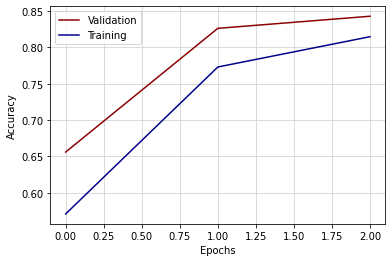

In [339]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_val, 'darkred')
plt.plot(acc_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

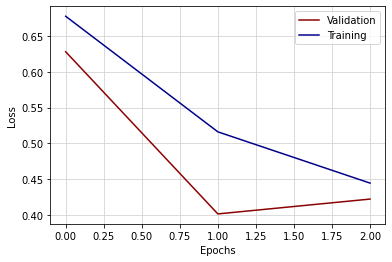

In [340]:
loss_val = history['val_loss']
loss_tra = history['loss']
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(loss_val, 'darkred')
plt.plot(loss_tra, 'darkblue')
plt.legend(['Validation','Training'])
plt.grid(c='lightgrey')
plt.show()

In [321]:
from sklearn.metrics import confusion_matrix , classification_report
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis = 1)
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n", confusion_mtx)

confusion matrix=
 [[1408    327]
 [456    1197]]


In [324]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("F1 Score: %.2f%%" % (f1_score(y_test, y_pred, average='macro')*100))
print("Precision: %.2f%%" % (precision_score(y_test, y_pred, average='macro')*100))
print("Recall: %.2f%%" % (recall_score(y_test, y_pred, average='macro')*100))

F1 Score: 75.35%
Precision: 78.54%
Recall: 72.41%
